# Giriş

## 1.Hafta
Merhaba, birinci haftanın ödevini hazırladım. Bu çalışmamda bu hafta öğrendiğim Machine Learning modelini veri setime uyguladım. Bu çalışmam Kaggle platformu üzerinden gerçekleştirdim.<br>
Bu hafta öğrendiğimiz modeller:
- Linear Regression
- Multiple Linear Regression
- Polynomial Linear Regression
- Support Vector Machine Regression
- Decision Tree Regressor<br>
Yukarıda görmüş olduğunuz modelleri öğrendik ve aynı zamanda modelleri uygulamadan önce veri setimizi model için hazırlamayıda öğrendik.

Ben bu çalışmamda ilk önce seçtiğim veri setini inceleyerek işe başladım. Veri setini inceledikten sonra modellerimi teker teker uyguladım tabiki uygulamadan önce modeller için veri setini uygun hale getiridim. Modellerimi uyguladıktan sonra sonuçları görselleştiridim.

## 2.Hafta
Bu hafta geçen hafta seçtiğim bu veri seti üzerinde çalışmalarda bulundum. 2.haftada öğrendiğim makine öğrenme modellerini bu veri setine uyguladım ve sonuçları görselleştirdim.<br>
Bu hafta uyguladığım modeller:
- Random Forest Regressor
- Support Vector Machine Classification
- Logistic Regression
- K-Nearest Neighbors(KNN)
    - GridSearch ile KNN
- Naive Bayes Classification
- Decision Tree Classification
- Random Forest Classification
- GridSearch<br>
Bu hafta yukarıdaki modelleri öğrendik ve bu veri bu veri setine yukarıdaki modelleri uyguladım.

Bu haftaki çalışmamda verilerim bir sınıfı yoktu ve score verilerini kullanarak veri setime yen bir sınıf kolonu ekledim. Bu sınıf kolunu kullanarak sınıflandırma işlemlerimi gerçekleştirdim.

Kullandığım veri setini incelemek istiyorsanız lütfen [buraya tıklayın](https://www.kaggle.com/datasets/unsdsn/world-happiness)

In [1]:
# Kullanacağım Kütüphanelerim
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Veri setlerimin yolları
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


# Veriye Ön Bakış
Bu bölümde veri setine bir ön bakış gerçekleştireceğim. Bunu yapma sebebim veri seti hakkında bilgi sahıbi olmak ve modellerimi en doğru şekilde veri setime uygulamak.

In [2]:
# Pandas kütüphanesi ile veri setimi okuyorum!
data19 = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

# Veri setimiz
data19

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
# Veri setinin içerisindeki kolonların tiplerine ve boş değerlerin olup olmadığına bakıyorum.
data19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:
# Bu kısımda veri setindeki kolonların en büyük ve en küçük değerleri gibi değerleri bakıyorum
data19.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
# Bu kısımda veri setindeki kolonların arasındaki ilişkiye bakıyorum.
# 1'e yakın olanlarda doğrusal ilişki oluyor
# -1'e yakın olanlarda doğrusal olmayan ilişki oluyor.
data19.corr()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


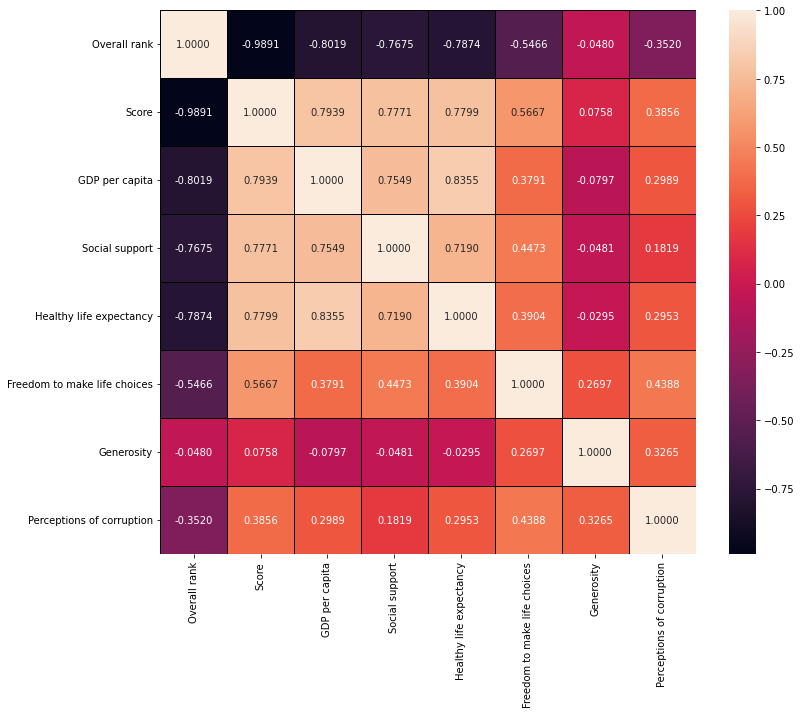

In [6]:
# data.corr seaborn kütüphanesi ile görselleştirilmiş hali
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data19.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

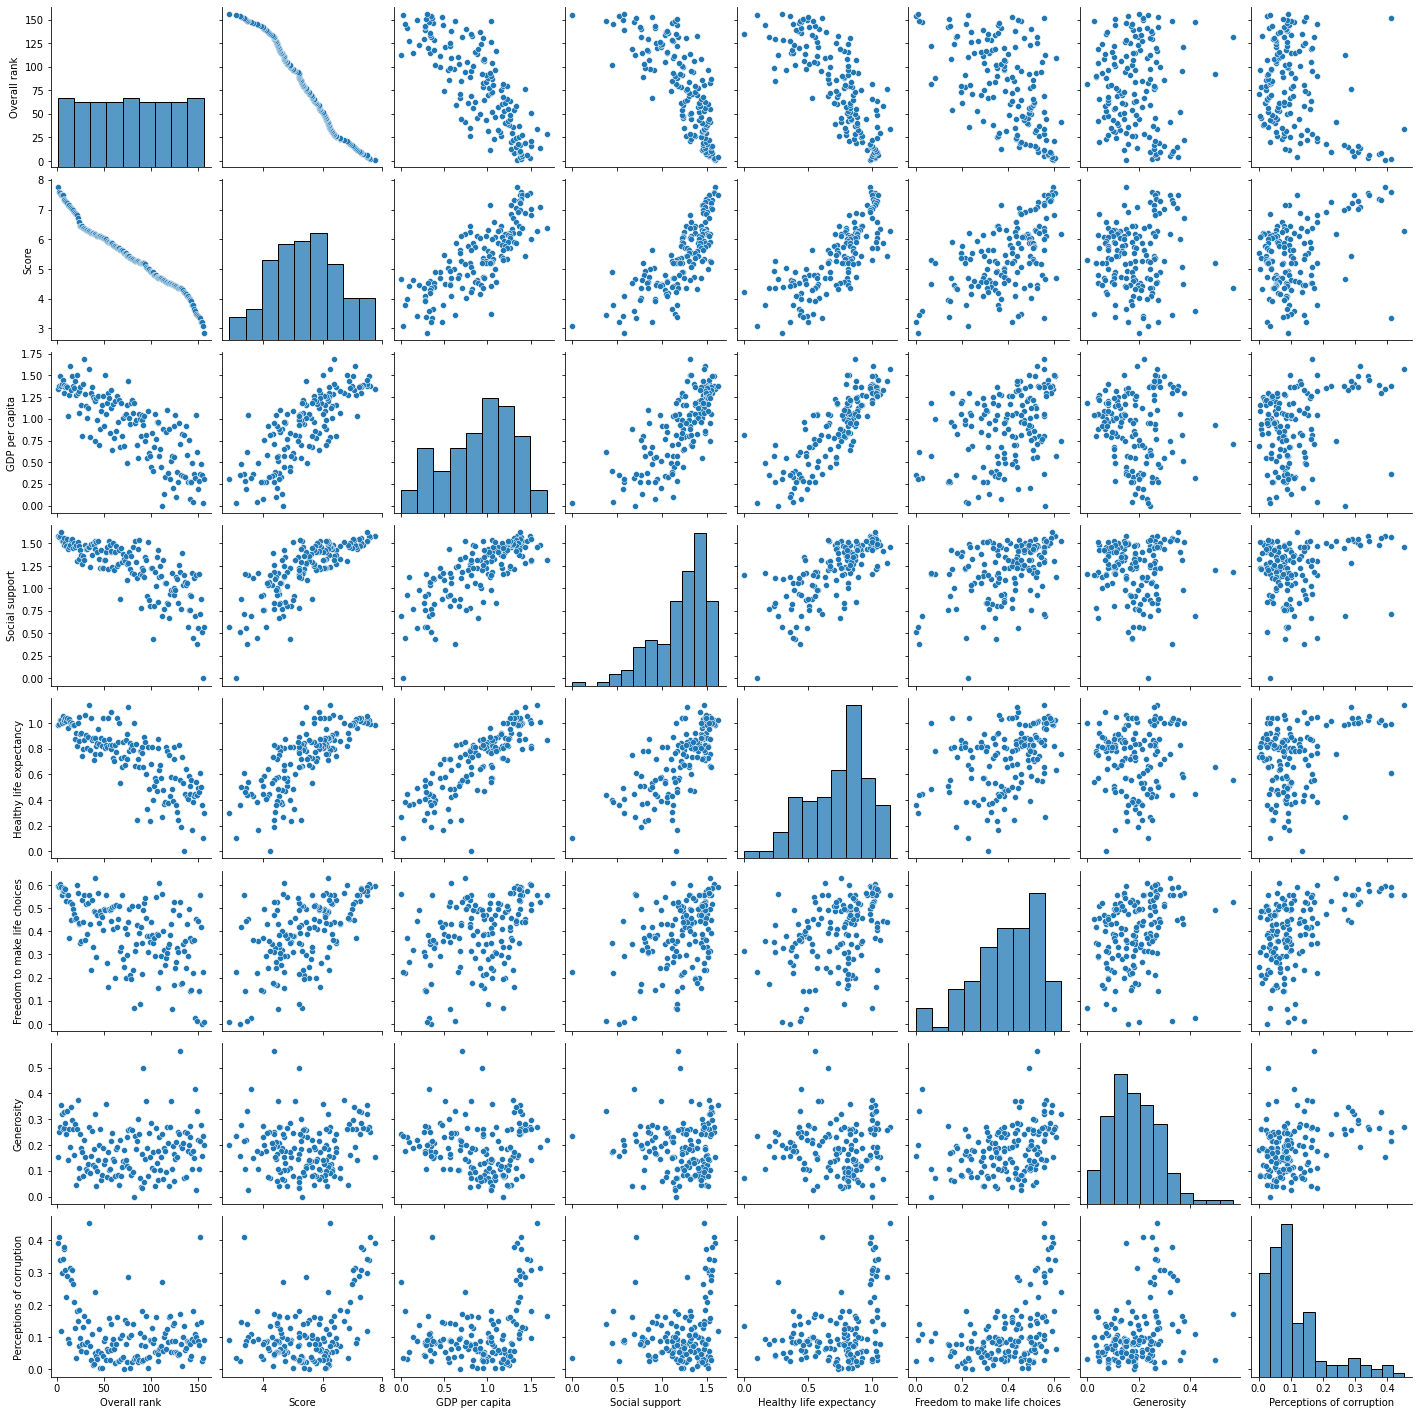

In [7]:
# Bu kısıdam yine veri seti içerindeki kolonların arasındaki dağılımı görselleştirdim!
sns.pairplot(data19)

Yukarıdaki görsellde kolonlar arasındaki ilişkiyi ve iki kolon arasında veri değerlerinin dağılımını görmekteyim!

In [8]:
# Veri setimizin içindeki kolon isimlari
data19.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
# Her bir kolonda ne kadar boş değer var olduğuna bakıyorum!
for i in range(len(data19.columns)):
    sum_nan = data19[data19.columns[i]].isnull().sum()
    print("{} kolonun {} bu kadar NaN değer vardır!".format(data19.columns[i], sum_nan))

Overall rank kolonun 0 bu kadar NaN değer vardır!
Country or region kolonun 0 bu kadar NaN değer vardır!
Score kolonun 0 bu kadar NaN değer vardır!
GDP per capita kolonun 0 bu kadar NaN değer vardır!
Social support kolonun 0 bu kadar NaN değer vardır!
Healthy life expectancy kolonun 0 bu kadar NaN değer vardır!
Freedom to make life choices kolonun 0 bu kadar NaN değer vardır!
Generosity kolonun 0 bu kadar NaN değer vardır!
Perceptions of corruption kolonun 0 bu kadar NaN değer vardır!


# Linear Regression
Bu bölümde veri setime linear regressin modelini uygulayacağım!

In [10]:
# Seçtiğim kolonların bir değişkene atanması
# Healthy life expectancy (hle) x değerimiz
# GDP per capita (gpc) y değerimiz
hle = data19.iloc[:,5:6].values
gpc = data19.iloc[:,3:4].values

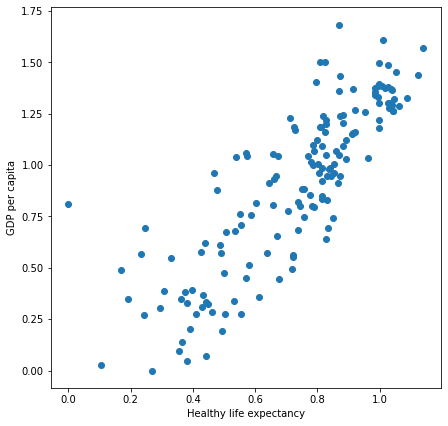

In [11]:
# Seçtiğim klonların bir görselleştirmesi
plt.figure(figsize=[7,7])
plt.scatter(x=hle,y=gpc)
plt.xlabel('Healthy life expectancy')
plt.ylabel('GDP per capita')
plt.show()

Bu verileri seçme nedenim aralarında doğrusal bir ilişki olması!

Score:  0.697996945669796


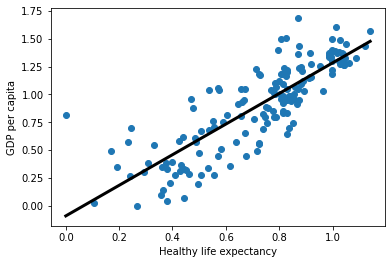

In [12]:
# Bu kısımda seçtiğimiz değişkenlere veri setimizi uyguluyoruz!
reg = LinearRegression()

# Test edeceğim verilerin oluşturulması
predic_npspace = np.linspace(min(hle), max(hle)).reshape(-1,1)

# Fit
reg.fit(hle,gpc)

# Predict
predicted = reg.predict(predic_npspace)

# score
print("Score: ",reg.score(hle,gpc))

# Plot regression line and scatter
plt.plot(predic_npspace, predicted, color = "black", linewidth = 3)
plt.scatter(x = hle, y = gpc)
plt.xlabel('Healthy life expectancy')
plt.ylabel('GDP per capita')
plt.show()

In [13]:
# Eğittiğimiz modeli kendim test ediyorum!
print("Healthy life expectancy: 12 değeri GDP per capita: {} eşittir.".format(reg.predict([[12]])))
print("Healthy life expectancy: 0.72 değeri GDP per capita: {} eşittir.".format(reg.predict([[0.72]])))
print("Healthy life expectancy: 142 değeri GDP per capita: {} eşittir.".format(reg.predict([[142]])))

Healthy life expectancy: 12 değeri GDP per capita: [[16.40415664]] eşittir.
Healthy life expectancy: 0.72 değeri GDP per capita: [[0.89793926]] eşittir.
Healthy life expectancy: 142 değeri GDP per capita: [[195.11056269]] eşittir.


Bu kısımda Standart Scaler uyguladım verilerin eğitimi gerçekleştireceğim.

In [14]:
# Verilerimi Standart Scaler uyguluyorum.
sc = StandardScaler()
ss_hle = sc.fit_transform(hle)
ss_gpc = sc.fit_transform(gpc)

Score:  0.697996945669796


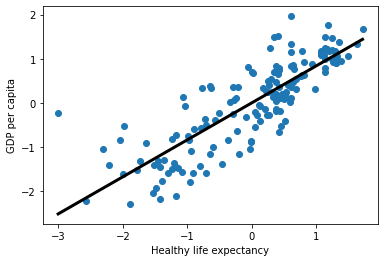

In [15]:
# Model
reg_ss = LinearRegression()

# Test edeceğim verilerin oluşturulması
predic_npspace_ss = np.linspace(min(ss_hle), max(ss_hle)).reshape(-1,1)

# Fit
reg_ss.fit(ss_hle,ss_gpc)

# Predict
predicted_ss = reg_ss.predict(predic_npspace_ss)

# Score
print("Score: ",reg_ss.score(ss_hle,ss_gpc))

# Plot regression line and scatter
plt.plot(predic_npspace_ss, predicted_ss, color = "black", linewidth = 3)
plt.scatter(x = ss_hle, y = ss_gpc)
plt.xlabel('Healthy life expectancy')
plt.ylabel('GDP per capita')
plt.show()

In [16]:
# Eğittiğimiz modeli kendim test ediyorum!
print("Healthy life expectancy: 12 değeri GDP per capita: {} eşittir.".format(reg_ss.predict([[12]])))
print("Healthy life expectancy: 0.72 değeri GDP per capita: {} eşittir.".format(reg_ss.predict([[0.72]])))
print("Healthy life expectancy: 142 değeri GDP per capita: {} eşittir.".format(reg_ss.predict([[142]])))

Healthy life expectancy: 12 değeri GDP per capita: [[10.02554538]] eşittir.
Healthy life expectancy: 0.72 değeri GDP per capita: [[0.60153272]] eşittir.
Healthy life expectancy: 142 değeri GDP per capita: [[118.63562034]] eşittir.


# Multiple Linear Regression
Bu kısımda seçtiğim verilere multiple linear regression modeli uygulayacağım!

In [17]:
# GDP per capita(gpc), Social support(sos), Healthy life expectancy(hle) x değerlerimiz olacak
# Score y değerimiz olacak

# x değerlerimiz
gpc = data19.iloc[:,3:4].values
sos = data19.iloc[:,4:5].values
hle = data19.iloc[:,5:6].values

# y değerlerimiz
score = data19.iloc[:,2:3].values

In [18]:
# Data freme dönşütürme
DFgpc = pd.DataFrame(gpc, columns = ["GDP_per_capita"])
DFsos = pd.DataFrame(sos, columns = ["Social_support"])
DFhle = pd.DataFrame(hle, columns = ["Healthy_life_expectancy"])

DFscore = pd.DataFrame(score, columns = ["Score"])

In [19]:
# Birleştirme
x = pd.concat([DFgpc, DFsos, DFhle], axis = 1)
y = DFscore

In [20]:
x

,GDP_per_capita,Social_support,Healthy_life_expectancy
0,1.340,1.587,0.986
1,1.383,1.573,0.996
2,1.488,1.582,1.028
3,1.380,1.624,1.026
4,1.396,1.522,0.999
...,...,...,...
151,0.359,0.711,0.614
152,0.476,0.885,0.499
153,0.350,0.517,0.361
154,0.026,0.000,0.105


In [21]:
y

,Score
0,7.769
1,7.600
2,7.554
3,7.494
4,7.488
...,...
151,3.334
152,3.231
153,3.203
154,3.083


In [22]:
# train ve test verilerimizi hazırlama
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [23]:
# Model
ml_lr = LinearRegression()

# Fit
ml_lr.fit(x_train,y_train)

# Predict
predicted = ml_lr.predict(x_test)

# Score
print("Score: ",ml_lr.score(x_test,y_test))

Score:  0.5586702812395359


In [24]:
# Uyarıları kapatmak için kullandım!
import warnings
warnings.filterwarnings('ignore')

# Eğittiğimiz modeli kendim test ediyorum!
print("gpc: 5 | sos: 7 | hle: 12 değerleri Score: {} eşittir.".format(ml_lr.predict([[5, 7, 12]])))
print("gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: {} eşittir.".format(ml_lr.predict([[0.2, 2, 5]])))
print("gpc: 56 | sos: 85 | hle: 74 değerleri Score: {} eşittir.".format(ml_lr.predict([[56, 85, 74]])))

gpc: 5 | sos: 7 | hle: 12 değerleri Score: [[30.06482836]] eşittir.
gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: [[10.55664211]] eşittir.
gpc: 56 | sos: 85 | hle: 74 değerleri Score: [[266.31160683]] eşittir.


Bu kısımda Standart Scaler uyguladım verilerin eğitimi gerçekleştireceğim.

In [25]:
# Verilerimi Standart Scaler uyguluyorum.
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)
Y_train = sc.fit_transform(y_train)
Y_test = sc.fit_transform(y_test)

In [26]:
# Model
ml_lr_ss = LinearRegression()

# Fit
ml_lr_ss.fit(X_train, Y_train)

# Predict
predicted = ml_lr_ss.predict(X_test)

# Score
print("R^2 score: ",ml_lr_ss.score(X_test,Y_test))

R^2 score:  0.5646346433674168


In [27]:
# Uyarıları kapatmak için kullandım!
import warnings
warnings.filterwarnings('ignore')

# Eğittiğimiz modeli kendim test ediyorum!
print("gpc: 5 | sos: 7 | hle: 12 değerleri Score: {} eşittir.".format(ml_lr_ss.predict([[5, 7, 12]])))
print("gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: {} eşittir.".format(ml_lr_ss.predict([[0.2, 2, 5]])))
print("gpc: 56 | sos: 85 | hle: 74 değerleri Score: {} eşittir.".format(ml_lr_ss.predict([[56, 85, 74]])))

gpc: 5 | sos: 7 | hle: 12 değerleri Score: [[7.34303153]] eşittir.
gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: [[2.10028719]] eşittir.
gpc: 56 | sos: 85 | hle: 74 değerleri Score: [[71.17519568]] eşittir.


# Polynomial Linear Regression
Bu kısımda kendim yeni bir veri seti oluşturdum çünü bu modelimiz aralarında bu modeli uygulabileceğim polynomial ilişki olan veriler yoktu!

In [28]:
# PLR için veri setini oluşturuyorum. Bu model için bu veri setim uygun değil.
# Veri setimizin değerleri
Car_price = [60,70,80,100,120,150,200,250,300,400,500,750,1000,2000,3000]
Car_Max_Speed = [180,180,200,200,200,220,240,240,300,350,350,360,365,365,365]

# Listeden array'e çeviriyorum
Car_Price = np.array(Car_price)
Car_Max_Speed = np.array(Car_Max_Speed)

# Oluşturduğum arrayleri dataframe çeviriyorum
DataCar = {'Car_price': Car_Price, 'Car_Max_Speed': Car_Max_Speed}
DataCar = pd.DataFrame(DataCar)

# Modellerimizde çalışması için verinin shape değiştiriyorum.
x_train_DataCar = DataCar.Car_price.values.reshape(-1,1)
y_train_DataCar = DataCar.Car_Max_Speed.values.reshape(-1,1)

DataCar

,Car_price,Car_Max_Speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200
5,150,220
6,200,240
7,250,240
8,300,300
9,400,350


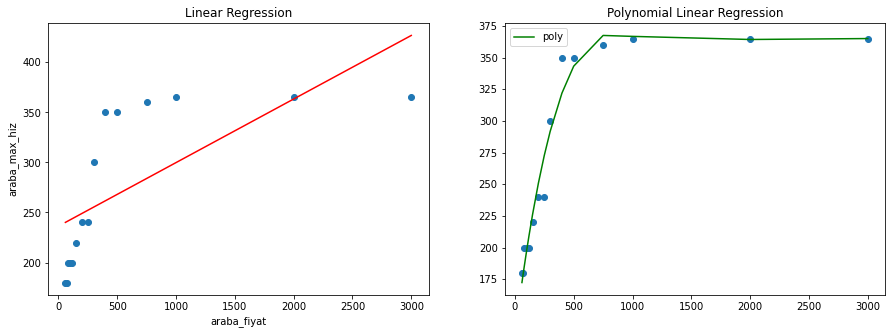

In [29]:
# İlk önce Linear Regression ile tahmin yapacağım!
lr_plr = LinearRegression()

lr_plr.fit(x_train_DataCar, y_train_DataCar)

y_head = lr_plr.predict(x_train_DataCar)

# Bundan sonraki kısım Ploy. kütüphanesi ile tahin kımım!
pf0 = PolynomialFeatures(degree = 4)

x_pol = pf0.fit_transform(x_train_DataCar)

lr_plr2 = LinearRegression()

lr_plr2.fit(x_pol, y_train_DataCar)

y_head2 = lr_plr2.predict(x_pol)

# Sonuçların Görelleitirilmesi!
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(x_train_DataCar, y_train_DataCar)
plt.plot(x_train_DataCar, y_head, color = "red")
plt.title("Linear Regression")
plt.ylabel("araba_max_hiz")
plt.xlabel("araba_fiyat")


plt.subplot(1, 2, 2)
plt.scatter(x_train_DataCar, y_train_DataCar)
plt.plot(x_train_DataCar, y_head2, color = "green", label = "poly")
plt.title("Polynomial Linear Regression")
plt.legend()

plt.show()

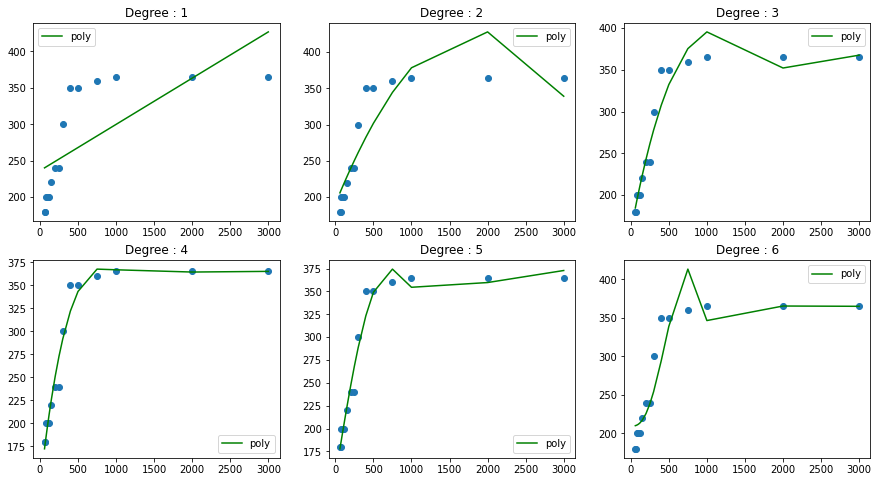

In [30]:
# Bu kod bloğunda 1 den 6 ya kadar degree değerler verip sonuçları görselleştirdim.
plt.figure(figsize=(15,8))
for i in range(1,7):
    pf1 = PolynomialFeatures(degree = i)
    
    x_pol0 = pf1.fit_transform(x_train_DataCar)

    lr_plr3 = LinearRegression()

    lr_plr3.fit(x_pol0, y_train_DataCar)

    y_head3 = lr_plr3.predict(x_pol0)
    
    plt.subplot(2, 3, i)
    plt.scatter(x_train_DataCar, y_train_DataCar)
    plt.plot(x_train_DataCar, y_head3, color = "green", label = "poly")
    plt.title("Degree : {}".format(i))
    plt.legend()
plt.show()

# Support Vector Machine Regression
Bu kısımda verilerime Support Vector Machine Regression modelini uygulayacağım!

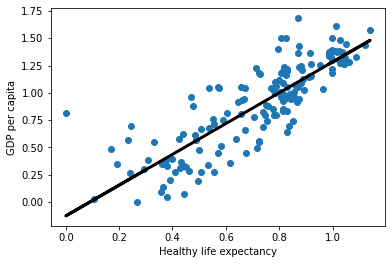

In [31]:
# Bu modelde önceden hazırladığım verilerimi kullanacağım!
# İlk olarak Linear regressionda ilk kullandığım veri seti ile başlayacağım.

svr0 = SVR(kernel= "linear")

svr0.fit(hle,gpc)

y_pred_svr0 = svr0.predict(hle)

# Plot regression line and scatter
plt.plot(hle, y_pred_svr0, color = "black", linewidth = 3)
plt.scatter(x = hle, y = gpc)
plt.xlabel('Healthy life expectancy')
plt.ylabel('GDP per capita')
plt.show()

In [32]:
# Bu kısımda Multiple Linear Regression modelinde kullandığım modeli kullanacağım
# Standart scaller uygulanmış hallerini kullancağım

svr1 = SVR(kernel= "linear")

svr1.fit(X_train,Y_train)

y_pred_svr1 = svr1.predict(X_train)

# Grafiğini çizdiremediğim için bende sonuçlarını yazıdayım dedim.
# Multiple Linear Regressionda aynı değerleri kullandım.
print("gpc: 5 | sos: 7 | hle: 12 değerleri Score: {} eşittir.".format(svr1.predict([[5, 7, 12]])))
print("gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: {} eşittir.".format(svr1.predict([[0.2, 2, 5]])))
print("gpc: 56 | sos: 85 | hle: 74 değerleri Score: {} eşittir.".format(svr1.predict([[56, 85, 74]])))

gpc: 5 | sos: 7 | hle: 12 değerleri Score: [7.47656176] eşittir.
gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: [2.16813812] eşittir.
gpc: 56 | sos: 85 | hle: 74 değerleri Score: [73.3088721] eşittir.


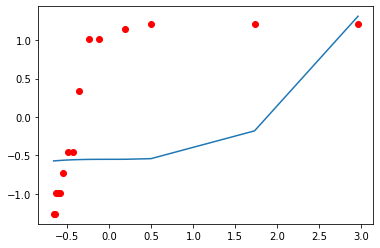

In [33]:
# Polinomial Linear Regression modelimiz için kullandığımız veri setini kullanacağım
sc0 = StandardScaler()
Xsc_DataCar = sc0.fit_transform(x_train_DataCar)
sc1 = StandardScaler()

Ysc_DataCar = np.ravel(sc1.fit_transform(y_train_DataCar.reshape(-1,1)))

svr2 = SVR(kernel = "poly", degree = 3)

svr2.fit(Xsc_DataCar, Ysc_DataCar)

y_pred_svr1 = svr2.predict(Xsc_DataCar)

plt.scatter(Xsc_DataCar, Ysc_DataCar, color = "red")
plt.plot(Xsc_DataCar, y_pred_svr1)
plt.show()

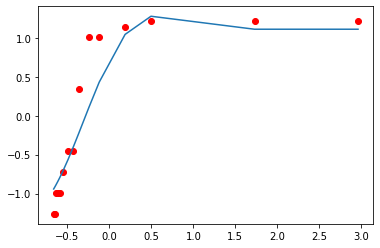

In [34]:
# Bu kısımda SVR modelin "rbf" fonksiyonunu kullanacağım
svr = SVR(kernel = "rbf")

svr.fit(Xsc_DataCar, Ysc_DataCar)

y_pred_svr0 = svr.predict(Xsc_DataCar)

plt.scatter(Xsc_DataCar, Ysc_DataCar, color = "red")
plt.plot(Xsc_DataCar, y_pred_svr0)
plt.show()

# Decision Tree Regressor
Bu kısımda verilerime Support Vector Machine Regression modelini uygulayacağım!

In [35]:
# İlk olarak linear regressionda ilk uyguladığım verilere uygulayacağım!
dtr0 = DecisionTreeRegressor(random_state = 0)

# Fit
dtr0.fit(hle,gpc)

# Predict
y_pred_dtr0 = dtr0.predict(hle)

# Eğittiğimiz modeli kendim test ediyorum!
print("Healthy life expectancy: 12 değeri GDP per capita: {} eşittir.".format(reg.predict([[12]])))
print("Healthy life expectancy: 0.72 değeri GDP per capita: {} eşittir.".format(reg.predict([[0.72]])))
print("Healthy life expectancy: 142 değeri GDP per capita: {} eşittir.".format(reg.predict([[142]])))

Healthy life expectancy: 12 değeri GDP per capita: [[16.40415664]] eşittir.
Healthy life expectancy: 0.72 değeri GDP per capita: [[0.89793926]] eşittir.
Healthy life expectancy: 142 değeri GDP per capita: [[195.11056269]] eşittir.


In [36]:
# Standart Scaller uygulanmış, Linear regressionda uguladım ikici verilere uygulayacağım.
dtr1 = DecisionTreeRegressor(random_state = 0)

dtr1.fit(X_train,Y_train)

y_pred_dtr1 = dtr1.predict(X_train)

# Eğittiğimiz modeli kendim test ediyorum!
print("gpc: 5 | sos: 7 | hle: 12 değerleri Score: {} eşittir.".format(dtr1.predict([[5, 7, 12]])))
print("gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: {} eşittir.".format(dtr1.predict([[0.2, 2, 5]])))
print("gpc: 56 | sos: 85 | hle: 74 değerleri Score: {} eşittir.".format(dtr1.predict([[56, 85, 74]])))

gpc: 5 | sos: 7 | hle: 12 değerleri Score: [1.83356203] eşittir.
gpc: 0.2 | sos: 2 | hle: 5 değerleri Score: [1.54834537] eşittir.
gpc: 56 | sos: 85 | hle: 74 değerleri Score: [1.83356203] eşittir.


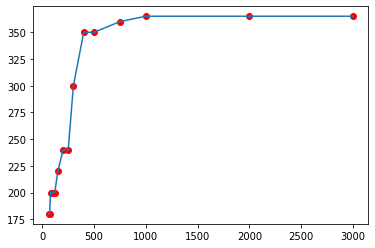

In [37]:
# Polynomial Linear Regression modelimde uyguladım ilk veri setine DTR uyguladım.(Standart Scaler uygulanmamış.)
dtr2 = DecisionTreeRegressor(random_state = 0)

dtr2.fit(x_train_DataCar, y_train_DataCar)

y_pred_dtr2 = dtr2.predict(x_train_DataCar)

plt.scatter(x_train_DataCar, y_train_DataCar, color = "red")
plt.plot(x_train_DataCar, y_pred_dtr2)
plt.show()

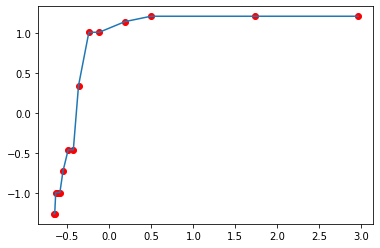

In [38]:
# Polynomial Linear Regression modelinde Standart Scaler uygulana veri setime DTR uygulayacağım
dtr3 = DecisionTreeRegressor(random_state = 0)

dtr3.fit(Xsc_DataCar, Ysc_DataCar)

y_pred_dtr3 = dtr3.predict(Xsc_DataCar)

plt.scatter(Xsc_DataCar, Ysc_DataCar, color = "red")
plt.plot(Xsc_DataCar, y_pred_dtr3)
plt.show()

# Random Forest Regressor

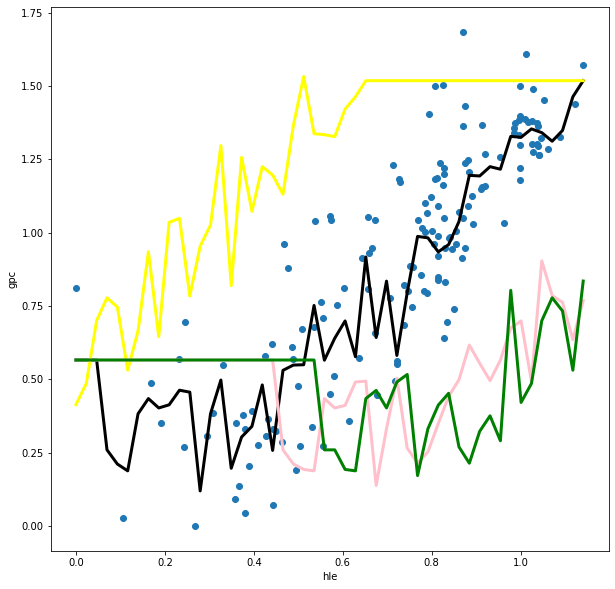

In [39]:
RanReg = RandomForestRegressor(random_state=42)
RanReg.fit(hle, gpc)
predic_npspace_Ran = np.linspace(min(hle), max(hle)).reshape(-1,1)

K = predic_npspace_Ran + 0.5
Z = predic_npspace_Ran - 0.4
W = predic_npspace_Ran - 0.5

predicted_Ran = RanReg.predict(predic_npspace_Ran)

plt.figure(figsize = (10,10))
plt.plot(predic_npspace_Ran, predicted_Ran, color = "black", linewidth = 3)
plt.plot(predic_npspace_Ran, RanReg.predict(K), color = "yellow", linewidth = 3)
plt.plot(predic_npspace_Ran, RanReg.predict(Z), color = "pink", linewidth = 3)
plt.plot(predic_npspace_Ran, RanReg.predict(W), color = "green", linewidth = 3)
plt.scatter(x = hle, y = gpc)
plt.xlabel("hle")
plt.ylabel("gpc")
plt.show()

# Sınıflandırma Algortimaları

In [40]:
# Sınıflandırmada kullanacağım kütüphaneler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [41]:
data_class = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

In [42]:
data_class

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [43]:
data_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [44]:
Scores = data19["Score"].values

In [45]:
np.dtype(data_class["Score"].mean())

dtype('float64')

In [46]:
print("Score Min: ", np.min(Scores))
print("Score Max: ", np.max(Scores))
print("Socre Std: ", np.std(Scores))
print("Score Mean: ", np.mean(Scores))
print("Score Medyan: ", np.median(Scores))
print("Score Toplam Sayısı", len(Scores))

Score Min:  2.853
Score Max:  7.769
Socre Std:  1.109546441054633
Score Mean:  5.407096153846155
Score Medyan:  5.3795
Score Toplam Sayısı 156


In [47]:
# Şimdi skorları sayı aralıklarına göre gruplayacağım
# iki grup oluşturacağım: A, B
# 0 grubu aralığı: Score minimum değeri ile medyan deperi | min - mean
# 1 grubu aralığı: Score maksimum değeri ile medyan değeri | max - mean

Score_list = []
for i in range(0, len(data_class["Score"])):
    if data_class["Score"][i] <= data_class["Score"].mean():
        Score_list.append(0)
    else:
        Score_list.append(1)

In [48]:
Score_list = pd.DataFrame(np.array(Score_list), columns=["Score_list"])
last_data = pd.concat([data_class, Score_list], axis = 1)

last_data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score_list
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,0
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,0


In [49]:
x = last_data.iloc[:,3:9].values
y = last_data.iloc[:,-1].values

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 0 )

In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

## Support Vector Machine Classification

In [52]:
svc = SVC()

p_svc = [{'C':[1,2,3,4,5],'kernel':['linear']},
    {'C':[1,2,3,4,5],'kernel':['rbf'],'gamma':[1,0.5,0.1,0.01,0.001]},
    {'C':[1,2,3,4,5],'kernel':['poly'],'degree':[1,2,3,4,5,6,7],'gamma':[1,0.5,0.1,0.01,0.001]}]

grid = GridSearchCV(estimator = svc, param_grid = p_svc, scoring = "accuracy", cv = 4)
grid_search = grid.fit(X_train, y_train)
y_pred_svc = grid_search.predict(X_test)


best_parm_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Best prameter of gridseach function: ", grid_search.best_params_)
print("Best score of gridsearch function: ",grid_search.best_score_ )

Best prameter of gridseach function:  {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
Best score of gridsearch function:  0.9326923076923077


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state = 0)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

bas_log = cross_val_score(estimator = logr, X = X_train, y = y_train,cv = 4)
print("Score: ", logr.score(X_test, y_test))
print(bas_log.mean())
print(bas_log.std())

[[22  4]
 [ 4 22]]
Score:  0.8461538461538461
0.8942307692307693
0.04191248984173726


## K-Nearest Neighbors(KNN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1, metric = "minkowski")
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

bas_knn = cross_val_score(estimator = knn, X = X_train, y = y_train,cv = 4)
print("Score: ", knn.score(X_test, y_test))
print(bas_knn.mean())
print(bas_knn.std())

[[20  6]
 [ 8 18]]
Score:  0.7307692307692307
0.8942307692307693
0.031890622984186566


### GridSearch ile KNN

In [55]:
knn_grid = KNeighborsClassifier(metric = "minkowski")

p_knn = {"n_neighbors" : range(1,10), "weights" : ["uniform", "distance"], "p" : [1,2]}

grid_knn = GridSearchCV(estimator = knn_grid, param_grid = p_knn, scoring = "accuracy", cv = 4)
grid_knn_search = grid_knn.fit(X_train, y_train)
y_pred_grid_knn = grid_knn.predict(X_test)

best_parm_grid_knn = grid_knn_search.best_params_
best_score_grid_knn = grid_knn_search.best_score_

print("Best prameter of gridseach function: ", best_parm_grid_knn)
print("Best score of gridsearch function: ",best_score_grid_knn)


Best prameter of gridseach function:  {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
Best score of gridsearch function:  0.9134615384615384


## Naive Bayes Classification

In [56]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = gnb.predict(X_test)

cm_gnb = confusion_matrix(y_test, y_gnb_pred)
print(cm_gnb)

bas_svc_gnb = cross_val_score(estimator = gnb, X = X_train, y = y_train,cv = 4)
print("Score: ", gnb.score(X_test, y_test))
print(bas_svc_gnb.mean())
print(bas_svc_gnb.std())

[[22  4]
 [ 4 22]]
Score:  0.8461538461538461
0.8942307692307693
0.06305229350290385


In [57]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

cm_bnb=confusion_matrix(y_test, y_pred_bnb)
print(cm_bnb)

print("Sınıflandırma Raporu \n",metrics.classification_report(y_test, y_pred_bnb))
print("Doğruluk Değeri :", metrics.accuracy_score(y_test, y_pred_bnb))

bas_na = cross_val_score(estimator=bnb, X = X_train, y = y_train, cv = 5)
print("Score: ", gnb.score(X_test, y_test))
print(bas_na.mean())
print(bas_na.std())

[[21  5]
 [ 3 23]]
Sınıflandırma Raporu 
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        26
           1       0.82      0.88      0.85        26

    accuracy                           0.85        52
   macro avg       0.85      0.85      0.85        52
weighted avg       0.85      0.85      0.85        52

Doğruluk Değeri : 0.8461538461538461
Score:  0.8461538461538461
0.8842857142857141
0.0779499228748206


## Decision Tree Classification

In [58]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()

p_dtc = {"criterion" : ["gini", "entropy"], "splitter" : ["best", "random"], }

grid_dtc = GridSearchCV(estimator = dtr, param_grid = p_dtc, scoring = "accuracy", cv = 4)
grid_dtc_search = grid_dtc.fit(X_train, y_train)
y_pred_grid_dtc = grid_dtc.predict(X_test)

best_parm_grid_dtc = grid_dtc_search.best_params_
best_score_grid_dtc = grid_dtc_search.best_score_

print("Best prameter of gridseach function: ", best_parm_grid_dtc)
print("Best score of gridsearch function: ",best_score_grid_dtc)

Best prameter of gridseach function:  {'criterion': 'gini', 'splitter': 'best'}
Best score of gridsearch function:  0.8942307692307693


## Random Forest Classification

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

p_rfc = {"n_estimators" : range(1,50), "criterion" : ["gini", "entropy"], "class_weight" : ["balanced", "balanced_subsample"]}

grid_rfc = GridSearchCV(estimator = rfc, param_grid = p_rfc, scoring = "accuracy", cv = 4)
grid_rfc_search = grid_rfc.fit(X_train, y_train)
y_pred_grid_rfc = grid_rfc.predict(X_test)
    
best_parm_grid_rfc = grid_rfc_search.best_params_
best_score_grid_rfc = grid_rfc_search.best_score_

print("Best prameter of gridseach function: ", best_parm_grid_rfc)
print("Best score of gridsearch function: ",best_score_grid_rfc)

Best prameter of gridseach function:  {'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 21}
Best score of gridsearch function:  0.9326923076923077


# Sonuç
Umarım hazırladığım bu çalışmayı benmişsinizdir. Bu hafta öğrendiğim modelleri ve veri seti hazırlama tekniklerini veri setime uyguladım.